# Exercise 13: Differential Equations (ODEs)

**Goals**
- Understand how to model simple physical systems with ordinary differential equations (ODEs)
- Implement basic numerical solvers (Euler, RK4)
- Use SciPy's `solve_ivp` to solve 1st/2nd order ODEs and systems of ODEs
- Visualize solutions and compare with analytic results when available

## 1. First-Order ODE: Exponential Decay
We start with a simple ODE with a known analytic solution:
\begin{equation}
\frac{dy}{dt} = -k\,y, \qquad y(0) = y_0
\end{equation}

Analytic solution:
\begin{equation}
y(t) = y_0\,e^{-kt}.
\end{equation}

Examples:

- **Radioactive decay**: $^{238}\mathrm{U} \;\longrightarrow\; ^{234}\mathrm{Th} + \alpha$

- **RC circuit**: capacitor discharge

- **RL circuit**: current decay

## (1) Euler and RK4 Methods
Let's implement two classic explicit solvers to see their behavior.

In [1]:
import numpy as np

# Radiative Decay (dy/dt = - ky)
def decay_rhs(t, y):
    return -k * y
    
# Euler Method
def euler(f, t0, y0, h, n_steps):
    t = np.empty(n_steps+1)
    y = np.empty(n_steps+1)
    t[0], y[0] = t0, y0
    for i in range(n_steps):
        y[i+1] = y[i] + h * f(t[i], y[i])
        t[i+1] = t[i] + h
    return t, y

# Runge-Kutta Method
def rk4(f, t0, y0, h, n_steps):
    t = np.empty(n_steps+1)
    y = np.empty(n_steps+1)
    t[0], y[0] = t0, y0
    for i in range(n_steps):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + 0.5*h, y[i] + 0.5*h*k1)
        k3 = f(t[i] + 0.5*h, y[i] + 0.5*h*k2)
        k4 = f(t[i] + h,   y[i] + h*k3)
        y[i+1] = y[i] + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)
        t[i+1] = t[i] + h
    return t, y


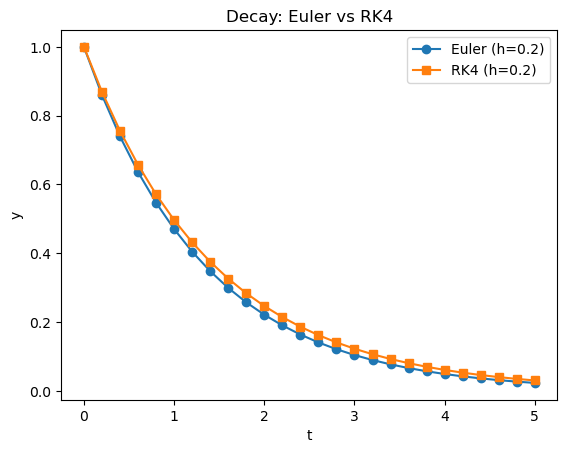

In [2]:
import matplotlib.pyplot as plt

# Initial Conditions
k = 0.7
t_span = (0.0, 5.0)
y0 = 1.0
h = 0.2
n_steps = int((t_span[1]-t_span[0])/h)

# Euler vs Runge-Kutta Method
te, ye = euler(decay_rhs, t_span[0], y0, h, n_steps)
tr, yr = rk4(decay_rhs, t_span[0], y0, h, n_steps)

plt.figure()
plt.plot(te, ye, 'o-', label='Euler (h=0.2)')
plt.plot(tr, yr, 's-', label='RK4 (h=0.2)')
plt.xlabel('t'); plt.ylabel('y'); plt.legend();
plt.title('Decay: Euler vs RK4')
plt.show()


## (2) SciPy Integration
Let's use SciPy (`method=RK45`) instead of classical methods.

In [3]:
from scipy.integrate import solve_ivp

t_eval = np.linspace(t_span[0], t_span[1], 200)
sol = solve_ivp(decay_rhs, t_span, [y0], t_eval=t_eval)

# Analytic solution
y_true = y0 * np.exp(-k * t_eval)


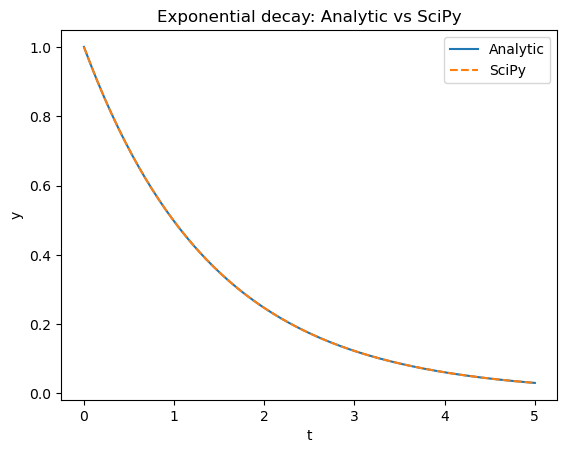

In [4]:
plt.figure()
plt.plot(t_eval, y_true, label='Analytic')
plt.plot(sol.t, sol.y[0], '--',label='SciPy')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Exponential decay: Analytic vs SciPy')
plt.legend()
plt.show()


## 2. Second-Order ODE: Mass–Spring–Damper
Equation: $m\,x'' + c\,x' + k\,x = 0$. Convert to first-order system with $y_1=x,\; y_2=x'$:
\begin{align}
y_1' &= y_2,\\
y_2' &= -(c/m)\,y_2 - (k/m)\,y_1.
\end{align}


In [31]:
# Mass Spring Damper (d2x/dt2 + c/m dx/dt + k/m x = 0)
def msd_rhs(t, y):
    x, v = y[0], y[1]
    dxdt = v
    dvdt = -(c/m)*v - (k_const/m)*x
    return [dxdt, dvdt]

# initial conditions and constants
m, c, k_const = 1.0, 0.3, 2.0
y0 = [1.0, 0.0]
t_span = (0.0, 20.0)
t_eval = np.linspace(t_span[0], t_span[1], 1500)

sol = solve_ivp(msd_rhs, t_span, y0, t_eval=t_eval)


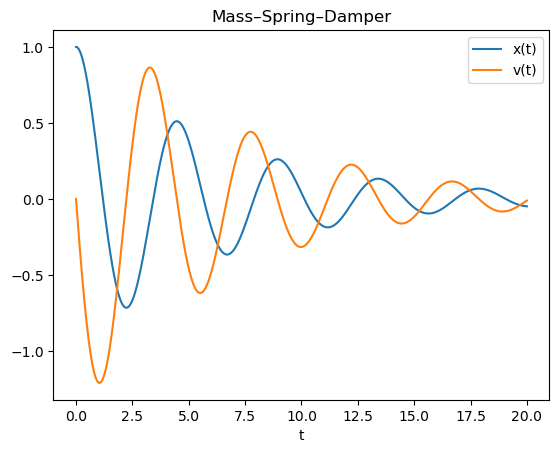

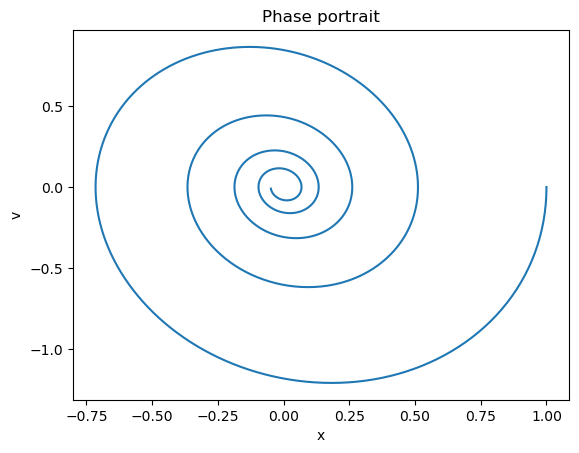

In [32]:
# plot
plt.figure()
plt.plot(sol.t, sol.y[0], label='x(t)')
plt.plot(sol.t, sol.y[1], label='v(t)')
plt.xlabel('t'); plt.title('Mass–Spring–Damper'); plt.legend();
plt.show()

# Phase portrait
plt.figure()
plt.plot(sol.y[0], sol.y[1])
plt.xlabel('x'); plt.ylabel('v'); plt.title('Phase portrait');
plt.show()
